# Does a relationship exist between chest girth and weight of Bears

The data set that is being used has the following variables:
    
|  Variable |  Representation |
| --- | -- | 
| <div style="text-align: left"> date </div> | <div style="text-align: center"> date measurements were taken </div> |
| <div style="text-align: left"> age </div> | <div style="text-align: center"> age in years </div> |
| <div style="text-align: left"> body_wt </div> | <div style="text-align: center"> body weight in kg </div> |
| <div style="text-align: left"> chest_girth </div> | <div style="text-align: center"> chest girth in cm </div> |
| <div style="text-align: left"> body_len </div> | <div style="text-align: center"> length of body in cm </div> |


Data taken from  article "Estimating the Live Body Weight of American Black Bears in Florida"
https://meridian.allenpress.com/jfwm/article/8/1/234/204243/Estimating-the-Live-Body-Weight-of-American-Black 

We will be examining the possible relationship between the following variables:

|  Variable |  Representation |
| --- | -- | 
| <div style="text-align: left"> body_wt </div> | <div style="text-align: center"> body weight in kg </div> |
| <div style="text-align: left"> chest_girth </div> | <div style="text-align: center"> chest girth in cm </div> |


## Step 1: Data Exploration and Data Preparation

In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import IPython.display as ipd
from statsmodels.formula.api import ols

In [36]:
# Read in the data
bears_df = pd.read_csv('bear_statistics_cleaned.csv')

# Check the data
bears_df.head()

,order,date,sex,age,body_wt,chest_girth,body_len
0,9,8/11/2005,FEMALE,1.67,26.31,54.2,113.3
1,6,5/11/2004,FEMALE,1.42,27.22,59.0,127.0
2,11,8/31/2007,FEMALE,1.67,22.68,60.0,109.0
3,129,6/20/2007,MALE,1.50,32.21,62.0,131.0
4,151,9/28/2010,MALE,1.75,36.29,63.0,121.0


#### Separate Male and Female Bears

In [37]:
# Create a dataframe of only the male bears
male_bears_df = bears_df[bears_df['sex']=='MALE']

# create new dataframe with only the columns we need
male_bears_df = male_bears_df[['body_wt', 'chest_girth']]

# Print the first 5 rows of the new dataframe
print('Head of male_bears_df:')
male_bears_df.head()

Head of male_bears_df:


,body_wt,chest_girth
3,32.21,62.0
4,36.29,63.0
6,35.38,63.5
7,43.09,66.0
11,44.45,67.0


In [38]:
# Create a dataframe with only the female bears
female_bears_df = bears_df[bears_df['sex']=='FEMALE']

# Create a new dataframe with only the columns we need
female_bears_df = female_bears_df[['body_wt', 'chest_girth']]

# Print the first 5 rows of the new dataframe
print('Head of female_bears_df:')
female_bears_df.head()

Head of female_bears_df:


,body_wt,chest_girth
0,26.31,54.2
1,27.22,59.0
2,22.68,60.0
5,44.45,63.0
8,40.82,66.0


#### Collect Sample of each Male and Female

In [39]:
# Collect a random sample of 100 Male Bears
male_bears_df = male_bears_df.sample(n=100, random_state=1)

# Collect a random sample of 100 Female Bears
female_bears_df = female_bears_df.sample(n=100, random_state=1)

### Summary Statistics  

In [40]:
# Summary Statistics for the body_wt and chest_girth for male bears
print('Male Bears Summary Statistics')
male_bears_df.describe()

Male Bears Summary Statistics


,body_wt,chest_girth
count,100.000000,100.000000
mean,98.878800,98.096000
std,40.666241,18.832193
min,32.210000,62.000000
25%,70.310000,86.475000
50%,91.855000,95.750000
75%,117.930000,108.000000
max,212.280000,152.000000


In [41]:
# Summary Statistics for the body_wt and chest_girth for female bears
print('Female Bears Summary Statistics')
female_bears_df.describe()

Female Bears Summary Statistics


,body_wt,chest_girth
count,100.000000,100.000000
mean,74.330200,88.077000
std,24.562964,13.315115
min,22.680000,54.200000
25%,58.970000,78.875000
50%,70.310000,86.250000
75%,86.747500,95.125000
max,162.390000,126.000000


In [42]:
st.skew(male_bears_df['body_wt'])

0.8557562401576528

## Step 2: Date Distribution Visualization 

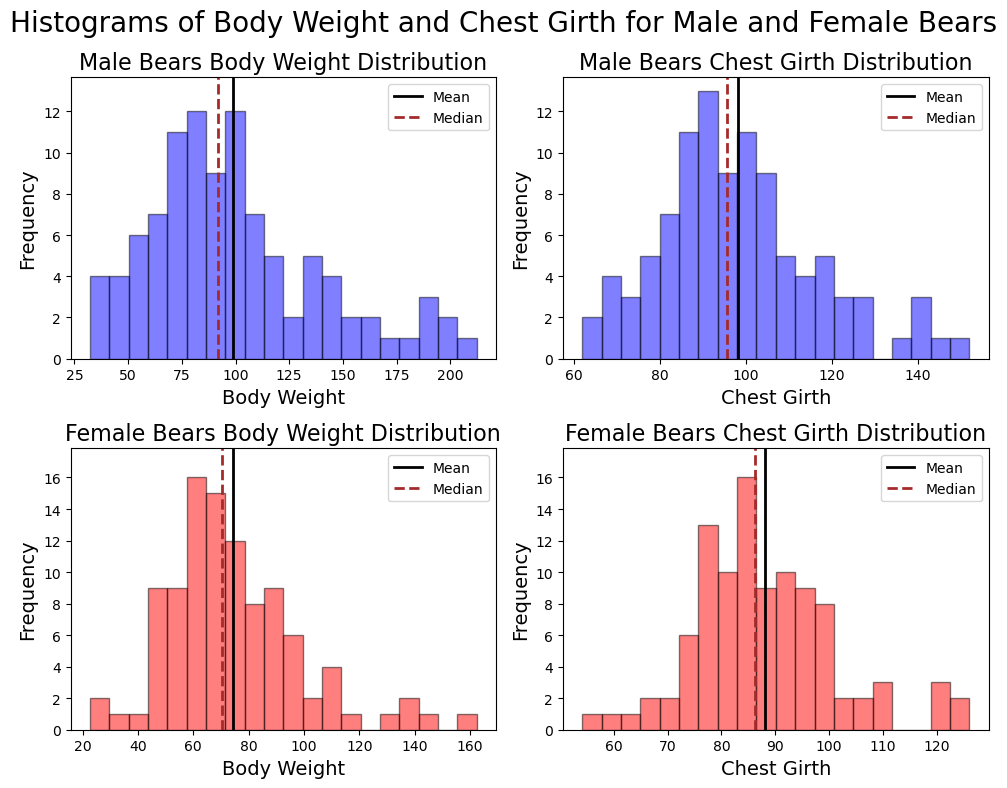

In [43]:
# Create a 4 subplots histogram for the distributions body_wt and chest_girth for male and female bears
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Histograms of Body Weight and Chest Girth for Male and Female Bears', fontsize=20)


ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(male_bears_df['body_wt'], bins=20, color='blue', alpha=0.5, edgecolor='black')
ax1.axline((male_bears_df['body_wt'].mean(), 0),(male_bears_df['body_wt'].mean(), 13), color='black', linestyle='-', linewidth=2)
ax1.axline((male_bears_df['body_wt'].median(), 0), (male_bears_df['body_wt'].median(), 13), color='brown', linestyle='--', linewidth=2)
ax1.set_title('Male Bears Body Weight Distribution', fontsize=16)
ax1.set_xlabel('Body Weight', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.legend(['Mean', 'Median'])

ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(male_bears_df['chest_girth'], bins=20, color='blue', alpha=0.5, edgecolor='black')
ax2.axline((male_bears_df['chest_girth'].mean(), 0),(male_bears_df['chest_girth'].mean(), 13), color='black', linestyle='-', linewidth=2)
ax2.axline((male_bears_df['chest_girth'].median(), 0), (male_bears_df['chest_girth'].median(), 13), color='brown', linestyle='--', linewidth=2)
ax2.set_title('Male Bears Chest Girth Distribution', fontsize=16)
ax2.set_xlabel('Chest Girth', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.legend(['Mean', 'Median'])

ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(female_bears_df['body_wt'], bins=20, color='red', alpha=0.5, edgecolor='black')
ax3.axline((female_bears_df['body_wt'].mean(), 0), (female_bears_df['body_wt'].mean(), 17), color='black', linestyle='-', linewidth=2)
ax3.axline((female_bears_df['body_wt'].median(), 0), (female_bears_df['body_wt'].median(), 17), color='brown', linestyle='--', linewidth=2)
ax3.set_title('Female Bears Body Weight Distribution', fontsize=16)
ax3.set_xlabel('Body Weight', fontsize=14)
ax3.set_ylabel('Frequency', fontsize=14)
ax3.legend(['Mean', 'Median'])

ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(female_bears_df['chest_girth'], bins=20, color='red', alpha=0.5, edgecolor='black')
ax4.axline((female_bears_df['chest_girth'].mean(), 0), (female_bears_df['chest_girth'].mean(), 17), color='black', linestyle='-', linewidth=2)
ax4.axline((female_bears_df['chest_girth'].median(), 0), (female_bears_df['chest_girth'].median(), 17), color='brown', linestyle='--', linewidth=2)
ax4.set_title('Female Bears Chest Girth Distribution', fontsize=16)
ax4.set_xlabel('Chest Girth', fontsize=14)
ax4.set_ylabel('Frequency', fontsize=14)
ax4.legend(['Mean', 'Median'])

plt.tight_layout()
plt.show()

In [44]:
# Create a function to classify the skewness
def classify_skewness(data):
    """
    Classify the skewness of a dataset into three categories.

    Parameters:
    data (array-like): The input data for which skewness is to be calculated.

    Returns:
    str: A string indicating the skewness category.
    """
    skew_value = st.skew(data)
    print('Skewness: ', round(skew_value, 2))

    if -0.5 <= skew_value <= 0.5:
        return "Nearly symmetrical"
    elif (-1 <= skew_value < -0.5) or (0.5 <= skew_value <= 1):
        return "Slightly skewed"
    else:
        return "Extremely skewed"

In [45]:
# calculate the skewness of male bears body weight
print('Male Bears Body Weight Skewness')
male_body_skew = classify_skewness(male_bears_df['body_wt'])
print(male_body_skew, '\n')

# calculate the skewness of male bears chest girth
print('Male Bears Chest Girth Skewness')
male_chest_skew = classify_skewness(male_bears_df['chest_girth'])
print(male_chest_skew, '\n')

# calculate the skewness of female bears body weight
print('Female Bears Body Weight Skewness')
female_body_skew = classify_skewness(female_bears_df['body_wt'])
print(female_body_skew, '\n')

# calculate the skewness of female bears chest girth
print('Female Bears Chest Girth Skewness')
female_chest_skew = classify_skewness(female_bears_df['chest_girth'])
print(female_chest_skew)


Male Bears Body Weight Skewness
Skewness:  0.86
Slightly skewed 

Male Bears Chest Girth Skewness
Skewness:  0.59
Slightly skewed 

Female Bears Body Weight Skewness
Skewness:  1.03
Extremely skewed 

Female Bears Chest Girth Skewness
Skewness:  0.56
Slightly skewed


## Step 3: Relationship between Body Weight and Chest Girth Visualization

### Male Bears

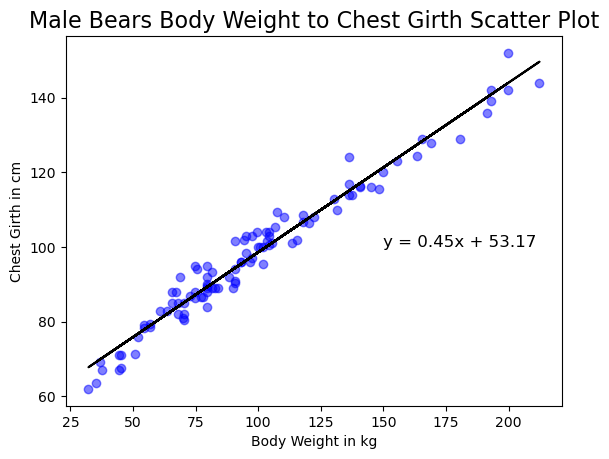

In [46]:
# Create a scatterplot for the body_wt and chest_girth of male bears
plt.plot(male_bears_df['body_wt'], male_bears_df['chest_girth'], 'o', color='blue', alpha=0.5)

# Plot the regression line
x = male_bears_df['body_wt']
y = male_bears_df['chest_girth']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black')

# Add the regression equation
plt.text(150, 100, 'y = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)), fontsize=12)

# Add labels and title
plt.title('Male Bears Body Weight to Chest Girth Scatter Plot', fontsize=16)
plt.xlabel('Body Weight in kg')
plt.ylabel('Chest Girth in cm')

plt.show()

### Female Bears

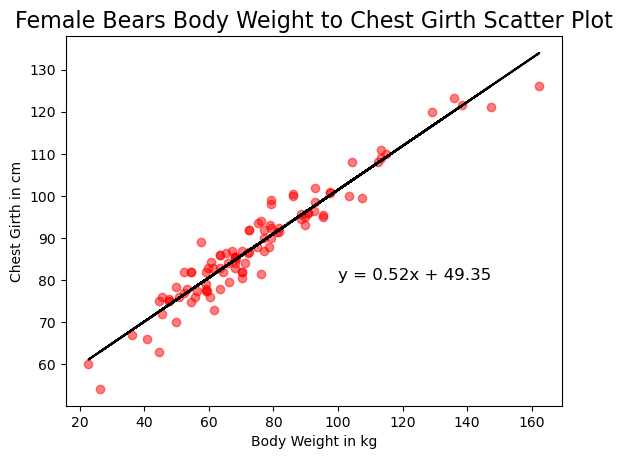

In [47]:
# Create a scatterplot for the body_wt and chest_girth of female bears
plt.plot(female_bears_df['body_wt'], female_bears_df['chest_girth'], 'o', color='red', alpha=0.5)

# Plot the regression line
x = female_bears_df['body_wt']
y = female_bears_df['chest_girth']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black')

# Add the regression equation
plt.text(100, 80, 'y = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)), fontsize=12)

# Add labels and title
plt.title('Female Bears Body Weight to Chest Girth Scatter Plot', fontsize=16)
plt.xlabel('Body Weight in kg')
plt.ylabel('Chest Girth in cm')

plt.show()

## Step 4: Regression Summary

### Male Bears

In [48]:
# Calculate the Pearson correlation coefficient 'r'
x = male_bears_df['body_wt']
y = male_bears_df['chest_girth']

r = np.corrcoef(x, y)[0,1]

print('Male Bears Pearson Correlation Coefficient: r = ', round(r, 4))

Male Bears Pearson Correlation Coefficient: r =  0.9812


In [49]:
# Create the simple linear regression model (Body Weight predicting Chest Girth)
model = ols('chest_girth ~ body_wt', data=male_bears_df).fit()

# Print model summary
print('Male Bears Simple Linear Regression Model Summary', '\n', model.summary())

Male Bears Simple Linear Regression Model Summary 
                             OLS Regression Results                            
Dep. Variable:            chest_girth   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     2539.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           7.08e-72
Time:                        16:59:50   Log-Likelihood:                -270.33
No. Observations:                 100   AIC:                             544.7
Df Residuals:                      98   BIC:                             549.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


### Female Bears

In [50]:
# Calculate the Pearson correlation coefficient 'r'
x = female_bears_df['body_wt']
y = female_bears_df['chest_girth']

r = np.corrcoef(x, y)[0,1]

print('Female Bears Pearson Correlation Coefficient: r = ', round(r, 4))

Female Bears Pearson Correlation Coefficient: r =  0.9611


In [51]:
# Create the simple linear regression model (Body Weight predicting Chest Girth)
model = ols('chest_girth ~ body_wt', data=female_bears_df).fit()

# Print model summary
print('Female Bears Simple Linear Regression Model Summary', '\n', model.summary())

Female Bears Simple Linear Regression Model Summary 
                             OLS Regression Results                            
Dep. Variable:            chest_girth   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.51e-56
Time:                        16:59:50   Log-Likelihood:                -271.66
No. Observations:                 100   AIC:                             547.3
Df Residuals:                      98   BIC:                             552.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## Step 5: Calculate the Residual Plot (QXQ Plot)

### Male Bears

Text(0.5, 1.0, 'Residual Plot for Male Bears Body Weight to Chest Girth')

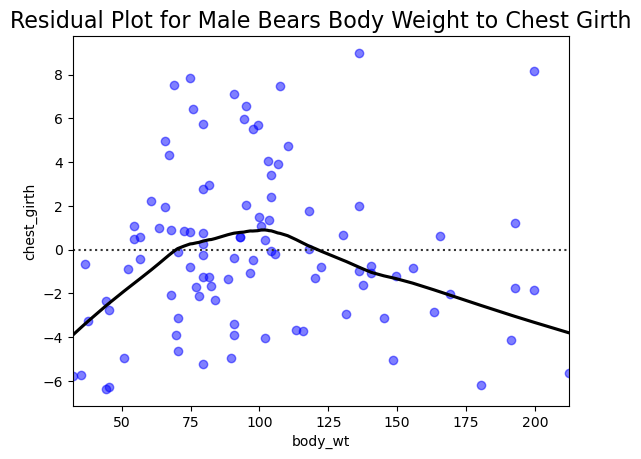

In [52]:
# Plot the residuals after fitting a linear model
x = male_bears_df['body_wt']
y = male_bears_df['chest_girth']

sns.residplot(x=x, y=y, lowess=True, color="blue", scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.title('Residual Plot for Male Bears Body Weight to Chest Girth', fontsize=16)

### Female Bears

Text(0.5, 1.0, 'Residual Plot for Female Bears Body Weight to Chest Girth')

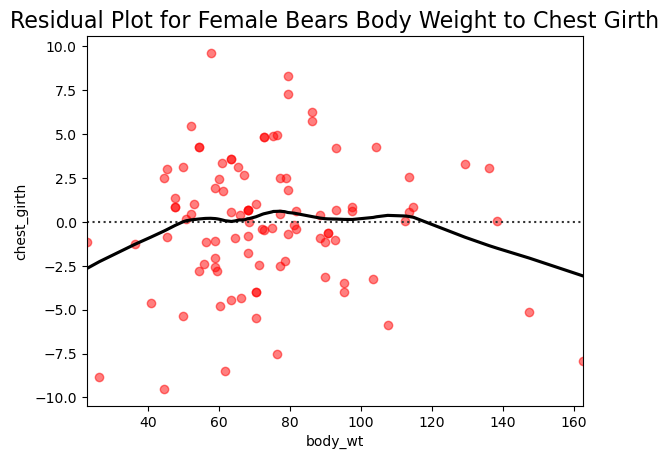

In [53]:
# Plot the residuals after fitting a linear model
x = female_bears_df['body_wt']
y = female_bears_df['chest_girth']

sns.residplot(x=x, y=y, lowess=True, color="red", scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.title('Residual Plot for Female Bears Body Weight to Chest Girth', fontsize=16)